### 데이터 처리
원핫인코딩

In [ ]:
import pandas as pd

# 기존 데이터 로드
df = pd.read_csv("./전처리/AR_CAR+라벨+시가총액+관심도+상승여부.csv")

# 라벨 1~3에서 모든 고유 라벨 항목 추출
unique_label_1 = df['라벨 1'].dropna().unique().tolist()
unique_label_2 = df['라벨 2'].dropna().unique().tolist()
unique_label_3 = df['라벨 3'].dropna().unique().tolist()

# 전체 유니크 라벨 목록 정리
all_labels = list(set(unique_label_1 + unique_label_2 + unique_label_3))

# 각 라벨에 대해 1/0 인코딩 열 생성
for label in all_labels:
    df[label] = df[['라벨 1', '라벨 2', '라벨 3']].apply(lambda row: int(label in row.values), axis=1)

# 저장할 파일 이름
output_filename = "df_라벨원핫포함_최종버전.csv"

# CSV로 저장 (인코딩은 Excel 호환 위해 cp949 또는 utf-8-sig 권장)
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"✅ 저장 완료: {output_filename}")


✅ 저장 완료: df_라벨원핫포함_최종버전.csv


In [5]:
len(df)

343

In [4]:
df.isna().sum()

소속사                  0
그룹                  98
연예인 이름               0
사건 내용                0
사건 날짜                0
매핑된 주가 날짜            0
CAR                  0
t통계량                 0
p값                   0
시가총액                 0
관심도                  0
stock_trend_n10      0
전일 대비 거래량 변화율        0
clean_text           0
라벨 1                88
라벨 2               203
라벨 3               294
사생활                  0
종교/이념                0
병역 문제                0
무혐의                  0
무의식적 태도              0
범죄 혐의                0
팬 대응                 0
사회적 감수성              0
기타                   0
발언 문제                0
세금 문제                0
혐의정보 유포              0
성 관련                 0
dtype: int64

모든 라벨 열에 대해 nan값인 행 드랍

In [8]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("df_사건별_정당성_검정결과+상승여부+거래량변화율+라벨링.csv")

# 라벨 열 목록
label_columns = ['라벨 1', '라벨 2', '라벨 3']

# 라벨 열이 모두 NaN인 행만 제거
df_cleaned = df[~df[label_columns].isnull().all(axis=1)]

# 결과 저장
df_cleaned.to_csv("df_라벨all결측제거.csv", index=False, encoding="utf-8-sig")
print("✅ 저장 완료: df_라벨all결측제거.csv")


✅ 저장 완료: df_라벨all결측제거.csv


In [9]:
len(df_cleaned)

255

In [10]:
len(df) - len(df_cleaned)

88

In [13]:
import pandas as pd

# 기존 데이터 로드
df = pd.read_csv("df_라벨all결측제거.csv")

# 라벨 1~3에서 모든 고유 라벨 항목 추출
unique_label_1 = df['라벨 1'].dropna().unique().tolist()
unique_label_2 = df['라벨 2'].dropna().unique().tolist()
unique_label_3 = df['라벨 3'].dropna().unique().tolist()

# 전체 유니크 라벨 목록 정리
all_labels = list(set(unique_label_1 + unique_label_2 + unique_label_3))

# 각 라벨에 대해 1/0 인코딩 열 생성
for label in all_labels:
    df[label] = df[['라벨 1', '라벨 2', '라벨 3']].apply(lambda row: int(label in row.values), axis=1)

# 저장할 파일 이름
output_filename = "df_라벨all결측제거_원핫인코딩.csv"

# CSV로 저장 (인코딩은 Excel 호환 위해 cp949 또는 utf-8-sig 권장)
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"✅ 저장 완료: {output_filename}")


✅ 저장 완료: df_라벨all결측제거_원핫인코딩.csv


In [14]:
df.isna().sum()

소속사                  0
그룹                  64
연예인 이름               0
사건 내용                0
사건 날짜                0
매핑된 주가 날짜            0
CAR                  0
t통계량                 0
p값                   0
시가총액                 0
관심도                  0
stock_trend_n10      0
전일 대비 거래량 변화율        0
clean_text           0
라벨 1                 0
라벨 2               115
라벨 3               206
사생활                  0
종교/이념                0
병역 문제                0
무혐의                  0
무의식적 태도              0
범죄 혐의                0
팬 대응                 0
사회적 감수성              0
기타                   0
발언 문제                0
세금 문제                0
혐의정보 유포              0
성 관련                 0
dtype: int64

In [24]:
len(df)

255

In [ ]:
### ar window로 거른 데이터터

In [22]:
import pandas as pd

# 1. 파일 경로 설정 (필요시 직접 경로 지정)
label_file = "df_라벨all결측제거_원핫인코딩.csv"
event_file = "C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/이벤트 스터디 결과/사건별_AR1_AR2_CAR12.csv"

# 2. 데이터 불러오기
df_label = pd.read_csv(label_file)
df_event = pd.read_csv(event_file)

# 3. 사건 내용 기준 공통된 행만 필터링
common_keys = set(df_label['사건 내용']).intersection(set(df_event['사건 내용']))
df_label_filtered = df_label[df_label['사건 내용'].isin(common_keys)]
df_event_filtered = df_event[df_event['사건 내용'].isin(common_keys)]

# 4. 병합에 필요한 열만 선택
label_columns = [
    '사생활', '종교/이념', '병역 문제', '무혐의', '무의식적 태도', '범죄 혐의',
    '팬 대응', '사회적 감수성', '기타', '발언 문제', '세금 문제', '혐의정보 유포', '성 관련',
    '시가총액', '관심도', 'stock_trend_n10', '전일 대비 거래량 변화율'
]
df_label_subset = df_label_filtered[['사건 내용'] + label_columns]

# 5. 병합 수행
df_merged = pd.merge(df_event_filtered, df_label_subset, on='사건 내용', how='inner')

# 6. 결과 저장
output_file = "지은데이터.csv"
df_merged.to_csv(output_file, index=False)
print(f"✅ 병합 완료: '{output_file}'로 저장됨")

✅ 병합 완료: '지은데이터.csv'로 저장됨


In [23]:
len(df_merged)

226

### 1. Lasso

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# 저장된 데이터 불러오기
df = pd.read_csv("지은데이터.csv")

# 사용 변수 설정
basic_features = ['시가총액', '관심도', 'stock_trend_n10', '전일 대비 거래량 변화율']
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측값 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

# 입력(X)과 타겟(y) 분리
X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# Train/Test 분할 (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso 회귀 학습 (교차검증 포함)
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = lasso_cv.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("📊 Lasso Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - 최적 Alpha: {lasso_cv.alpha_:.5f}")

# 계수 확인
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": lasso_cv.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\n🔍 주요 변수 계수:")
print(coef_df.head(10))


📊 Lasso Regression Evaluation
 - RMSE: 0.1737
 - MAE : 0.0864
 - R^2 : -0.0005
 - 최적 Alpha: 0.02621

🔍 주요 변수 계수:
           Feature  Coefficient
0             시가총액          0.0
1              관심도         -0.0
2  stock_trend_n10          0.0
3    전일 대비 거래량 변화율          0.0
4               기타          0.0
5            범죄 혐의         -0.0
6              무혐의         -0.0
7             팬 대응          0.0
8              사생활         -0.0
9          혐의정보 유포          0.0


### 2. Ridge

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 로딩
df = pd.read_csv("지은데이터.csv")

# 2. 변수 선택
basic_features = ['시가총액', '관심도', 'stock_trend_n10', '전일 대비 거래량 변화율']
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 3. Train/Test 분할 (6:4 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 4. 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Ridge 회귀 모델 학습 (교차검증 포함)
alphas = np.logspace(-4, 4, 100)  # 탐색할 alpha 값들
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = ridge_cv.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Ridge Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - 최적 Alpha: {ridge_cv.alpha_:.5f}")

# # 7. 계수 출력 (상위 10개)
# coef_df = pd.DataFrame({
#     "Feature": feature_cols,
#     "Coefficient": ridge_cv.coef_
# }).sort_values(by="Coefficient", key=abs, ascending=False)

# print("\n🔍 주요 변수 계수:")
# print(coef_df.head(10))


📊 Ridge Regression Evaluation
 - RMSE: 0.1445
 - MAE : 0.0830
 - R^2 : 0.0243
 - 최적 Alpha: 351.11917


### 3. XGboost

In [16]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 9.8 MB/s eta 0:00:16
   - -------------------------------------- 4.5/150.0 MB 10.8 MB/s eta 0:00:14
   - -------------------------------------- 7.3/150.0 MB 11.9 MB/s eta 0:00:12
   -- ------------------------------------- 7.6/150.0 MB 12.1 MB/s eta 0:00:12
   -- ------------------------------------- 8.4/150.0 MB 8.0 MB/s eta 0:00:18
   -- ------------------------------------- 11.0/150.0 MB 8.7 MB/s eta 0:00:16
   --- ------------------------------------ 13.1/150.0 MB 9.0 MB/s eta 0:00:16
   ---- ----------------------------------- 15.5/150.0 MB 9.3 MB/s eta 0:00:15
   ---- ----------------------------------- 17.3/150.0 MB 9.5 MB/s eta 0:00:14
   ---- ----------------------------------- 17.3/150.0 MB 9.5 MB/s eta 0:00:14
   ----- ---------------------------------- 19.4/150.0 MB 8.4 MB/s eta 0:00:16
   ----- ---------------------------------- 21.5/150.0 MB 8.7 


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


📊 XGBoost Regression Evaluation
 - RMSE: 0.0454
 - MAE : 0.0308
 - R^2 : 0.9315


C:\Users\chica\AppData\Local\Temp\ipykernel_13052\318448365.py:72: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


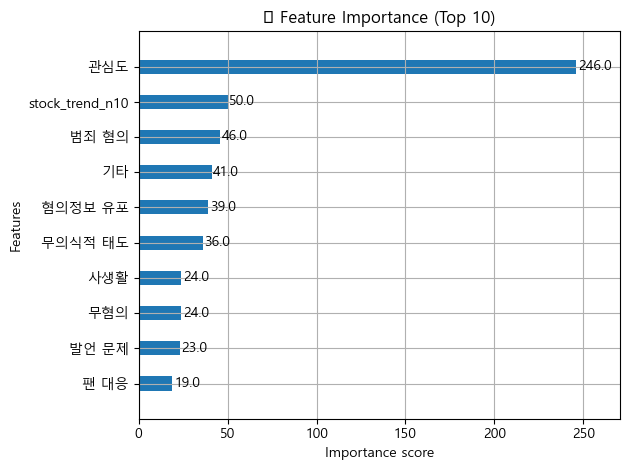

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: Windows에서는 'Malgun Gothic', Mac에서는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 데이터 로딩
df = pd.read_csv("지은데이터.csv")

# 2. 변수 선택
basic_features = [#'시가총액', 
                  '관심도', 'stock_trend_n10', 
                  #'전일 대비 거래량 변화율'
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 3. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 4. 스케일링 (XGBoost는 스케일링 없어도 되지만 여기선 동일한 조건으로 유지)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 회귀 모델 정의 및 학습
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
# 7. 중요 변수 시각화 (상위 10개)
xgb.plot_importance(xgb_reg, max_num_features=10, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()